# 0.1 Google File Stream

In order to access the google drive files via VScode you need to install the google drive app on your computer. This will create a directory where all of your google drive files are stored on your computer. Any files in this directory will be automatically uploaded/updated in the google drive. To access the files in this path you need to define your own path. 

My path is shown below. Comment out my path and add your own. Whenever you run this notebook make sure that your path is the one that has been run here. 

Then to access any files in the drive within the code you can do something like: `"{}03-LSD-calculations/LSD/hybrid_maskdepth0.02_tellClean/".format(path)`

In [1]:

path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path


# 0.2 PYTHONPATH

For Mac:
* Ask Vero how to set up a pythonpath

For windows: 
* Create a directory where you will store your unreleased python packages (specpolFlow and LSDpy). 

* In PowerShell type `setx.exe PYTHONPATH "C:\Users\pjsta\MyPythonPrograms"` Where the thing in the "" is the path of the directory you created. 
    
* Then git clone specpolflow and LSDpy into that directory and close and reopen VScode.

# 0.3 Importing Packages

In [4]:

import LSDpy.lsdpy
import specpolFlow as pol



import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import itertools
import pandas as pd

In [5]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [6]:
StarData

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Halpha shape,Notes,BadvsiniFlag,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,6226.0,hd6226,1,15000,4.0,T15000g40,120.00,absorption,"no disk during observation, rotational modulation",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7636.0,hd7636,2,15000,4.0,T15000g40,220.00,asymetric single,binary? no tess observation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10144.0,hd10144,1,20000,3.5,T20000g35,245.31,bowl,binary or pulsator,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10516.0,hd10516,1,25000,4.0,T25000g40,382.04,asymetric double,sdO companion https://iopscience.iop.org/artic...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11415.0,hd11415,1,18000,4.0,T18000g40,48.00,absorption,not a binary https://iopscience.iop.org/articl...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,217891.0,hd217891,5,15000,3.0,T15000g30,95.00,single,not a binary https://iopscience.iop.org/articl...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,221507.0,hd221507,1,10500,4.0,T10500g40,40.00,absorption,Not a Be star,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,224686.0,hd224686,2,13000,4.0,T13000g40,286.16,shell,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,239712.0,hd239712,1,21000,4.0,T21000g40,304.86,asymetric double,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Observations

,1,Unnamed: 1,Unnamed: 2,Name,LSDfileName,NameAsif,NameOfMask,Unnamed: 7,NameOfSymbolicLinkToData,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,185,1.0,1,hd6226,hd6226_1.lsd.s,hd6226_1,mask_T15000g40lamb3700_9000.dat,0,hd6226_11AP14_1310132pnv.s,110.34,-60.297909,-70.000000
1,193,2.0,1,hd7636,hd7636_1.lsd.s,hd7636_1,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1314767pnv.s,230.00,0.000000,0.000000
2,194,2.0,2,hd7636,hd7636_2.lsd.s,hd7636_2,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1316457pnv.s,230.00,0.000000,0.000000
3,2,3.0,1,hd10144,hd10144_1.lsd.s,hd10144_1,mask_T20000g35lamb3700_9000.dat,1,hd10144_187.D-0917A_2011-12-11_01_pnv.s,245.31,12.981952,12.981952
4,3,4.0,1,hd10516,hd10516_1.lsd.s,hd10516_1,mask_T25000g40lamb3700_9000.dat,0,hd10516_11AP14_1311181pnv.s,382.04,-60.990786,-60.990786
...,...,...,...,...,...,...,...,...,...,...,...,...
196,137,74.0,1,hd221507,hd221507_1.lsd.s,hd221507_1,mask_T10500g40lamb3700_9000.dat,1,hd221507_187.D-0917A_2012-07-19_01_pnv.s,20.00,0.000072,0.000072
197,140,75.0,1,hd224686,hd224686_1.lsd.s,hd224686_1,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-09_01_pnv.s,286.16,11.694301,11.694301
198,141,75.0,2,hd224686,hd224686_2.lsd.s,hd224686_2,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-12_01_pnv.s,286.16,8.724928,8.724928
199,145,76.0,1,hd239712,hd239712_1.lsd.s,hd239712_1,mask_T21000g40lamb3700_9000.dat,0,hd239712_11BP14_1331344pnv.s,304.86,-0.002959,-0.002959


# 1. Demo for single star

The next major step in the Be star project is to run all the stars through pyRaven to calculate the maximum value of Bpole. This take a VERY long time to do, and we don't want to do it for all eight mask models. The plots being made here will allow us to decide which models which don't need to be run through pyRaven. 

We are already excluding the line depth 0.1 models. So the models we want to compare are the following:
* hybrid_maskdepth0.02_tellClean
* hybrid_CleanAsif+tellClean
* hybrid_CleanAsifTweak+tellClean
* normalized_CleanAsif+tellClean
* normalized_CleanAsifTweak+tellClean

An example of the plots we would like for a single star are given below. 

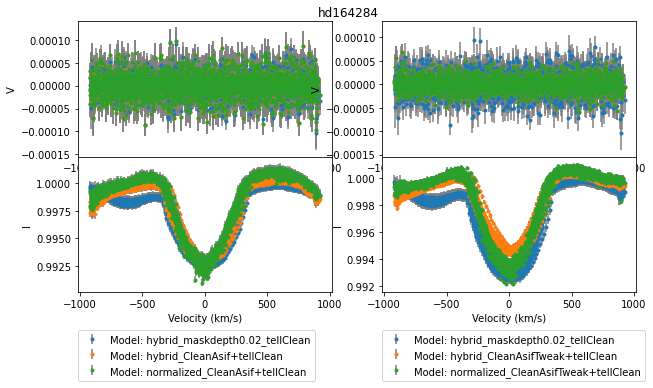

In [114]:
models1=['hybrid_maskdepth0.02_tellClean',
         'hybrid_CleanAsif+tellClean',
         'normalized_CleanAsif+tellClean']
models2=['hybrid_maskdepth0.02_tellClean',
 'hybrid_CleanAsifTweak+tellClean',
 'normalized_CleanAsifTweak+tellClean']

star=StarData['Name'][49]#12
obs=Observations.loc[Observations["Name"]==star]

fig, ax = plt.subplots(2,2, figsize=(10,5))
for j in range(len(models1)):
    for i in range(obs['Name'].size):

        file = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models1[j],star,i+1)
        lsd = pol.iolsd.read_lsd(file)
        vrad=obs['Unnamed: 11'][obs.index[i]]

        if i ==0:
            ax[1,0].errorbar(lsd.vel+vrad, lsd.specI, yerr=lsd.specSigI, xerr=None, fmt='o', ms=3,ecolor='0.5',label='Model: {}'.format(models1[j]),color='C{}'.format(j))
        else:
            ax[1,0].errorbar(lsd.vel+vrad, lsd.specI, yerr=lsd.specSigI, xerr=None, fmt='o', ms=3,ecolor='0.5',color='C{}'.format(j))
        ax[0,0].errorbar(lsd.vel+vrad, lsd.specV, yerr=lsd.specSigV, xerr=None, fmt='o', ms=3, ecolor='0.5',color='C{}'.format(j))
        plt.subplots_adjust(hspace=.0)
        ax[1,0].set_xlabel('Velocity (km/s)')
        ax[1,0].set_ylabel('I')
        ax[0,0].set_ylabel('V')

        file2 = '{}03-LSD-calculations/LSD/{}/{}_{}.lsd'.format(path,models2[j],star,i+1)
        lsd2 = pol.iolsd.read_lsd(file2)
        if i==0:
            ax[1,1].errorbar(lsd2.vel+vrad, lsd2.specI, yerr=lsd2.specSigI, xerr=None, fmt='o', ms=3,ecolor='0.5',label='Model: {}'.format(models2[j]),color='C{}'.format(j))
        else:
            ax[1,1].errorbar(lsd2.vel+vrad, lsd2.specI, yerr=lsd2.specSigI, xerr=None, fmt='o', ms=3,ecolor='0.5',color='C{}'.format(j))
        ax[0,1].errorbar(lsd2.vel+vrad, lsd2.specV, yerr=lsd2.specSigV, xerr=None, fmt='o', ms=3, ecolor='0.5',color='C{}'.format(j))
        plt.subplots_adjust(hspace=.0)
        ax[1,1].set_xlabel('Velocity (km/s)')

fig.suptitle(star,y=0.92)
ax[1,0].legend(loc=(0,-0.65))
ax[1,1].legend(loc=(0,-0.65))

# 2. Loop over all Stars

What we would like is for you make a loop that would make the above plot for each star and save the plots as a pdf.

Ideally what we want to see is no clear differences between the profiles. In that case, as with the left two demo plot, we only need to run one of the three models through pyRaven, saving a lot of time.
